---
title: Uncertainty Quantification in Linear Regression
---

In [111]:
import pandas as pd
uspop = pd.read_csv("POPTHM-Jan2025FRED.csv")
y = uspop['POPTHM']
n = len(y)
import numpy as np
x = np.arange(1, n + 1)
X = np.column_stack([np.ones(n), x])
print(y[:5])
print(X[:5])

0    175818
1    176044
2    176274
3    176503
4    176723
Name: POPTHM, dtype: int64
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [114]:
import statsmodels.api as sm
linmod = sm.OLS(y, X).fit()
print(linmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 POPTHM   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.422e+05
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:54:04   Log-Likelihood:                -7394.9
No. Observations:                 791   AIC:                         1.479e+04
Df Residuals:                     789   BIC:                         1.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+05    198.060    881.427      0.0

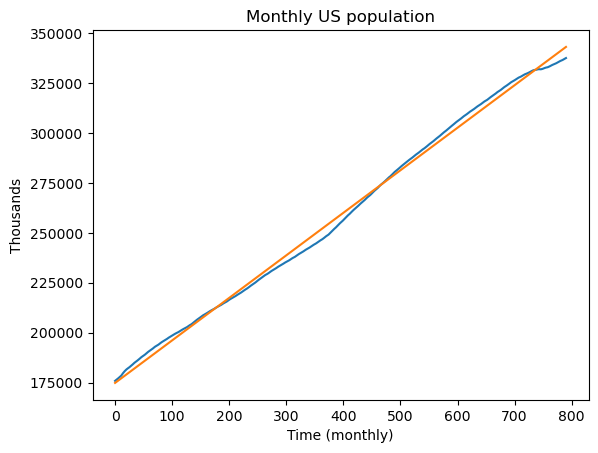

In [115]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.plot(linmod.fittedvalues)
plt.xlabel('Time (monthly)')
plt.ylabel('Thousands')
plt.title('Monthly US population')
plt.show()

In [92]:
#the coefficient estimates are: 
print(linmod.params)
print(linmod.cov_params())

const    174575.148609
x1          213.235255
dtype: float64
              const         x1
const  39227.640424 -74.341706
x1       -74.341706   0.187732


In [94]:
sighat = np.sqrt(np.sum(linmod.resid ** 2)/(n - 2))
XT = X.T
XTX = np.dot(XT, X)
XTX_inverse = np.linalg.inv(XTX)
covmat = (sighat ** 2) * XTX_inverse
print(covmat)

[[ 3.92276404e+04 -7.43417064e+01]
 [-7.43417064e+01  1.87731582e-01]]


In [ ]:
#Drawing posterior samples:
help(np.random.Generator.multivariate_normal)

In [96]:
N = 1000 #number of desired posterior samples
rng = np.random.default_rng()
samples_normalposterior = rng.multivariate_normal(mean = linmod.params, cov = linmod.cov_params(), size = N)
print(samples_normalposterior)

[[174270.47890247    213.30305805]
 [174921.21639834    212.59386417]
 [174800.67256417    212.86154695]
 ...
 [174435.25565323    213.53607588]
 [174718.07536863    212.93705101]
 [174937.11713602    212.68556081]]


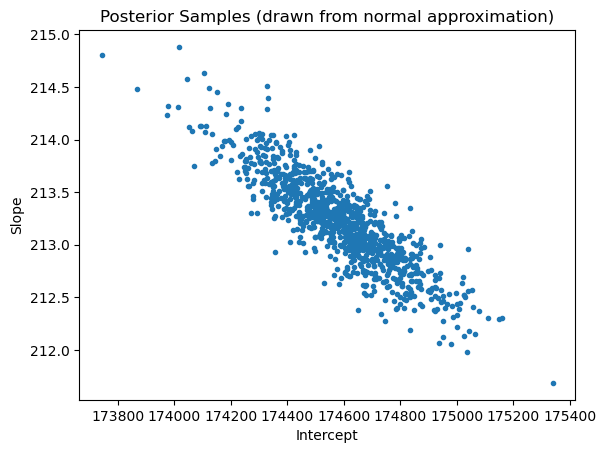

In [97]:
import matplotlib.pyplot as plt
plt.scatter(samples_normalposterior[:,0], samples_normalposterior[:,1], marker = '.')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.title('Posterior Samples (drawn from normal approximation)')
plt.show()

In [98]:
N = 2000 #number of desired posterior samples
rng = np.random.default_rng()
samples_normalposterior = rng.multivariate_normal(mean = linmod.params, cov = linmod.cov_params(), size = N)
demean_samples_normalposterior = samples_normalposterior - np.array(linmod.params)
chirvs = rng.chisquare(df = n-2, size = N)
samples_tposterior = np.zeros((N, 2))
for r in range(N):
    samples_tposterior[r] = (np.array(linmod.params)) + (demean_samples_normalposterior[r]/(np.sqrt(chirvs[r]/(n-2))))

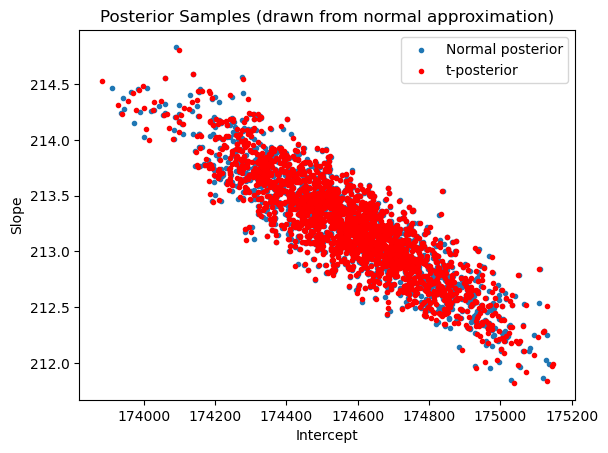

In [99]:
plt.scatter(samples_normalposterior[:,0], samples_normalposterior[:,1], marker = '.', label = 'Normal posterior')
plt.scatter(samples_tposterior[:,0], samples_tposterior[:,1], color = 'red', marker = '.', label = 't-posterior')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.title('Posterior Samples (drawn from normal approximation)')
plt.legend()
plt.show()

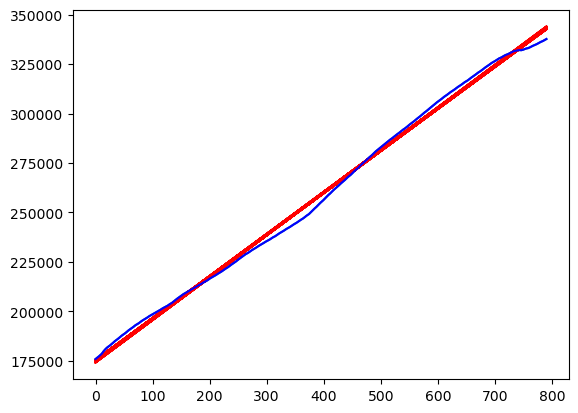

In [100]:
plt.plot(y)
for r in range(N):
    fvalsnew = np.dot(X, samples_tposterior[r])
    plt.plot(fvalsnew,  color = 'red')
plt.plot(y, color = 'blue')

    Unnamed: 0       x
0            1  580.38
1            2  581.86
2            3  580.97
3            4  580.80
4            5  579.79
..         ...     ...
93          94  578.52
94          95  579.74
95          96  579.31
96          97  579.89
97          98  579.96

[98 rows x 2 columns]


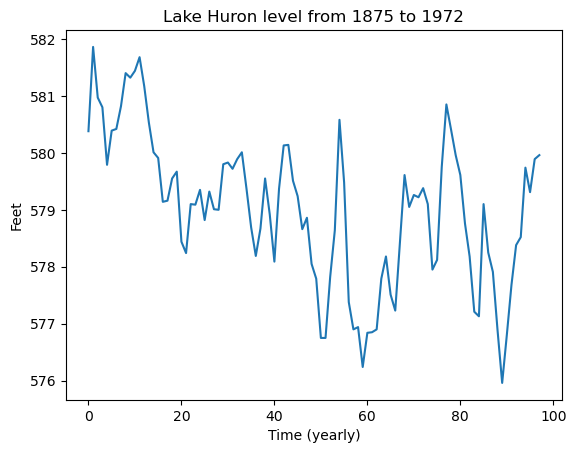

In [101]:
#Lake Huron dataset which gives annual measurements of the level (in feet) of Lake Huron from 1875 to 1972 
huron = pd.read_csv("LakeHuron.csv")
print(huron)
plt.plot(huron['x'])
plt.xlabel('Time (yearly)')
plt.ylabel('Feet')
plt.title('Lake Huron level from 1875 to 1972')
plt.show()

In [102]:
y = huron['x']
n = len(y)
x = np.arange(1, n+1)
X = np.column_stack([np.ones(n), x])
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 32.]
 [ 1. 33.]
 [ 1. 34.]
 [ 1. 35.]
 [ 1. 36.]
 [ 1. 37.]
 [ 1. 38.]
 [ 1. 39.]
 [ 1. 40.]
 [ 1. 41.]
 [ 1. 42.]
 [ 1. 43.]
 [ 1. 44.]
 [ 1. 45.]
 [ 1. 46.]
 [ 1. 47.]
 [ 1. 48.]
 [ 1. 49.]
 [ 1. 50.]
 [ 1. 51.]
 [ 1. 52.]
 [ 1. 53.]
 [ 1. 54.]
 [ 1. 55.]
 [ 1. 56.]
 [ 1. 57.]
 [ 1. 58.]
 [ 1. 59.]
 [ 1. 60.]
 [ 1. 61.]
 [ 1. 62.]
 [ 1. 63.]
 [ 1. 64.]
 [ 1. 65.]
 [ 1. 66.]
 [ 1. 67.]
 [ 1. 68.]
 [ 1. 69.]
 [ 1. 70.]
 [ 1. 71.]
 [ 1. 72.]
 [ 1. 73.]
 [ 1. 74.]
 [ 1. 75.]
 [ 1. 76.]
 [ 1. 77.]
 [ 1. 78.]
 [ 1. 79.]
 [ 1. 80.]
 [ 1. 81.]
 [ 1. 82.]
 [ 1. 83.]
 [ 1. 84.]
 [ 1. 85.]
 [ 1. 86.]
 [ 1. 87.]
 [ 1. 88.]
 [ 1. 89.]
 [ 1. 90.]
 [ 1. 91.]

In [103]:
linmod = sm.OLS(y, X).fit()
print(linmod.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     35.95
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           3.55e-08
Time:                        16:52:56   Log-Likelihood:                -150.05
No. Observations:                  98   AIC:                             304.1
Df Residuals:                      96   BIC:                             309.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        580.2020      0.230   2521.398      0.0

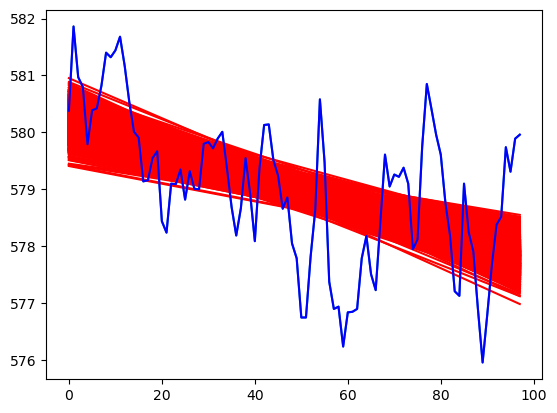

In [104]:
N = 2000 #number of desired posterior samples
rng = np.random.default_rng()
samples_normalposterior = rng.multivariate_normal(mean = linmod.params, cov = linmod.cov_params(), size = N)
demean_samples_normalposterior = samples_normalposterior - np.array(linmod.params)
chirvs = rng.chisquare(df = n-2, size = N)
samples_tposterior = np.zeros((N, 2))
for r in range(N):
    samples_tposterior[r] = (np.array(linmod.params)) + (demean_samples_normalposterior[r]/(np.sqrt(chirvs[r]/(n-2))))
plt.plot(y)
for r in range(N):
    fvalsnew = np.dot(X, samples_tposterior[r])
    plt.plot(fvalsnew,  color = 'red')
plt.plot(y, color = 'blue')

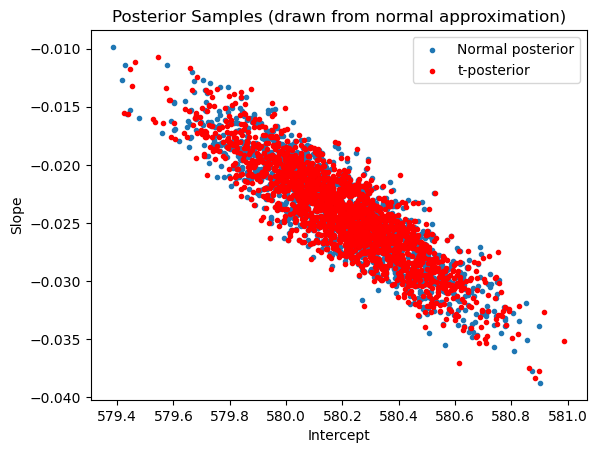

In [105]:
plt.scatter(samples_normalposterior[:,0], samples_normalposterior[:,1], marker = '.', label = 'Normal posterior')
plt.scatter(samples_tposterior[:,0], samples_tposterior[:,1], color = 'red', marker = '.', label = 't-posterior')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.title('Posterior Samples (drawn from normal approximation)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'A simulated dataset')

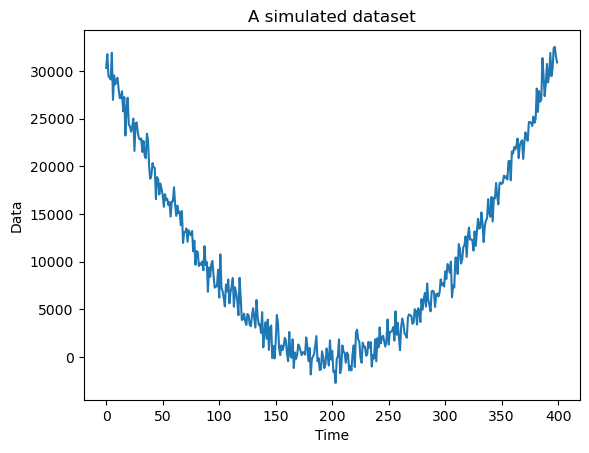

In [106]:
#A simulated dataset
n = 400
x = np.arange(1, n+1)
sig = 1000
y = 5 + 0.8 * ((x - (n/2)) ** 2) + rng.normal(loc = 0, scale = sig, size = n)
plt.plot(y) 
plt.xlabel("Time")
plt.ylabel("Data")
plt.title("A simulated dataset")

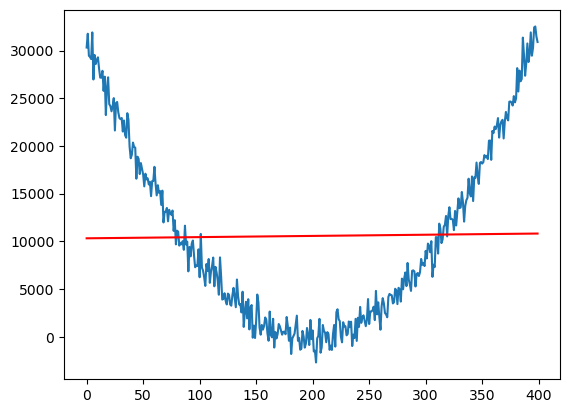

In [107]:
X = np.column_stack([np.ones(n), x])
linmod = sm.OLS(y, X).fit()
plt.plot(y)
plt.plot(linmod.fittedvalues, color = "red")

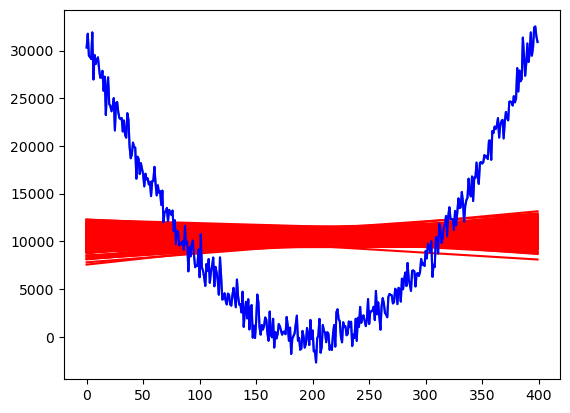

In [108]:
N = 200 #number of desired posterior samples
rng = np.random.default_rng()
samples_normalposterior = rng.multivariate_normal(mean = linmod.params, cov = linmod.cov_params(), size = N)
demean_samples_normalposterior = samples_normalposterior - np.array(linmod.params)
chirvs = rng.chisquare(df = n-2, size = N)
samples_tposterior = np.zeros((N, 2))
for r in range(N):
    samples_tposterior[r] = (np.array(linmod.params)) + (demean_samples_normalposterior[r]/(np.sqrt(chirvs[r]/(n-2))))
plt.plot(y)
for r in range(N):
    fvalsnew = np.dot(X, samples_tposterior[r])
    plt.plot(fvalsnew,  color = 'red')
plt.plot(y, color = 'blue')

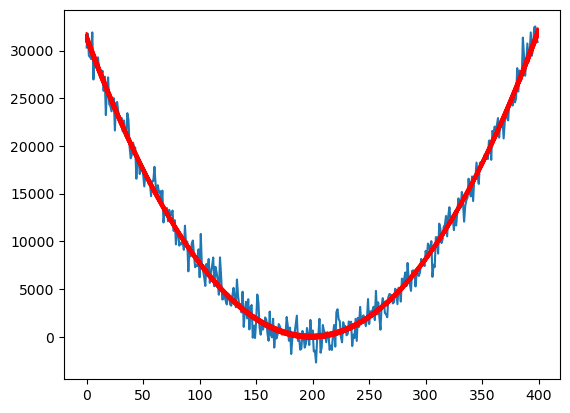

In [109]:
X  = np.column_stack([np.ones(n), x, x ** 2])
quadmod = sm.OLS(y, X).fit()
N = 200 #number of desired posterior samples
rng = np.random.default_rng()
samples_normalposterior = rng.multivariate_normal(mean = quadmod.params, cov = quadmod.cov_params(), size = N)
demean_samples_normalposterior = samples_normalposterior - np.array(quadmod.params)
chirvs = rng.chisquare(df = n-3, size = N)
samples_tposterior = np.zeros((N, 3))
for r in range(N):
    samples_tposterior[r] = (np.array(quadmod.params)) + (demean_samples_normalposterior[r]/(np.sqrt(chirvs[r]/(n-3))))
plt.plot(y)
for r in range(N):
    fvalsnew = np.dot(X, samples_tposterior[r])
    plt.plot(fvalsnew,  color = 'red')
#plt.plot(y, color = 'blue')